# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Ryan Reed

## What does a Simple Linear Regression Model do?
#### A Simple Linear Regression Model is used to estimate the relationship between two quantitative variables.*

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np
#%matplotlib inline

In [27]:
data = sns.load_dataset('diamonds') 

In [28]:
#Display the first five rows.
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- measures the type and strength of linera correlation between 2 variables
- r values range from 1.0 to -1.0
- positive correlation is r values >0
- negative correlation is r values <0
- no correlation is an r value of 0

In [29]:
#In a code cell, use the Pandas corr() method with the diamonds dataset and display the first seven rows.
data.corr(numeric_only=True).head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

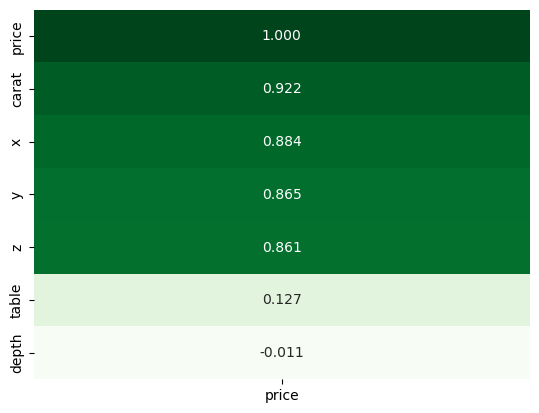

In [30]:
#corr = data.corr(numeric_only=True)
#sns.heatmap(data.corr(numeric_only=True), cmap="Greens", annot=True, vmin=-1.000, vmax=1.000, cbar=False)

sns.heatmap(data=data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset
2. Create model from training dataset
3. Validate model with test dataset
4. If model is valid, predict data with it

In [31]:
# this was done above
#In the next cell, add these imports needed for linear regression analysis:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split 


In [32]:
#Use the column with the strongest correlation to split the data into test
#and training datasets, where the test dataset consists of 30% of the total
#dataset. Specify a value of 20 for the random_state parameter.

x_train, x_test, y_train, y_test = train_test_split(data[['carat']],
    data[['price']], test_size=0.30, random_state=20)

In [33]:
#Create a LinearRegression object named model and print it.
model = LinearRegression()
print(model)

LinearRegression()


In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
model.score(x_test, y_test)

0.8504107786474794

In [36]:
#Use the model to predict the y values based on the x values in the
#test dataset. Assign the results in a variable and display the variable.

y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [37]:
# Put the predicted values in a new DataFrame with its single column 
# named predicted_price. Then display the first three throws. 

predictedvalues = pd.DataFrame(y_predicted, columns=['predicted_price'])
predictedvalues.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [43]:
# Join the y_test and predicted data with the x_test data and save the joined
# data in a new DataFrame. Then display the first five rows of the new DataFrame. 
# it doesn't specify to sort, the values are the same as the example but the columns aren't in the
# same position as the example I added the sort code to match the example from the word doc

combined = predictedvalues.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined[['carat', 'price', 'predicted_price']].head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [44]:
# Melt the price and predicted_price columns together, assigning values to the var_name
# and value_name as shown. Display the melted DataFrame.


melted = pd.melt(combined, id_vars=['carat'],
                value_vars=['price', 'predicted_price'],
                            var_name='price_type', value_name='price_value')
print(melted)

       carat       price_type  price_value
0       1.52            price  8674.000000
1       0.54            price  1637.000000
2       0.70            price  2657.000000
3       0.59            price  1838.000000
4       0.86            price  2980.000000
...      ...              ...          ...
32359   0.31  predicted_price   156.269013
32360   1.01  predicted_price  5585.245072
32361   1.53  predicted_price  9618.198715
32362   0.23  predicted_price  -464.185393
32363   1.00  predicted_price  5507.688271

[32364 rows x 3 columns]


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


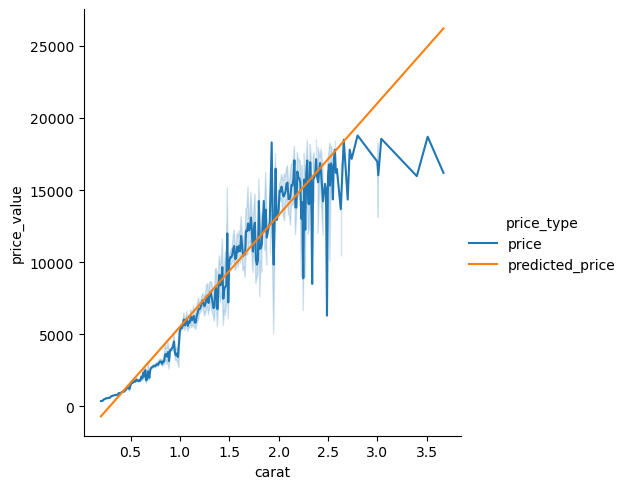

In [140]:
#Use a Seaborn line plot without a confidence interval to plot the predicted data.
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type')

## **Regression line equation is y = mx + b, where...**
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [141]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [142]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [143]:
# enter the lines in the cell - the result does not match, slope does but y-interept does not
# additionally the text doesn't match the example, even though the text is copied correctly.
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454247


In [144]:
# Use an f_string to print the equation of the regression line.

print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454247


In [145]:
# Estimate the price of a 0.70 carat diamond with the equation.
# Use an f_string to print the results as shown.
#I am a little stuck on here, it doesn't state to provide x in the f string, so I typed it out but if it is to be utilizing x
#and string formatting I was having issues getting it to 2 decimals as it was removing the last 0. Additionally per the example
#we have square brackets on the dollar amount, and then it needs formatted to 2 decimal places.
x = 0.70
y = m * x + b
print(f'The predicted price for a', f"{x:.2f}", f'carat diamond is ${y}')


The predicted price for a 0.70 carat diamond is $[3173.13735253]


In [146]:
# Estimate the price of a 0.54 carat diamond with the equation.
# Use an f_string to print the results as shown.
xx = 0.54
y = m * xx + b
print(f'The predicted price for a 0.54 carat diamond is ${y}')

The predicted price for a 0.54 carat diamond is $[1932.10925366]


In [ ]:
#Are the estimates in the previous two cells close to the predicted prices
#in the results of step 18?
They are a little off, perhaps due to the y intercept being a little off?

#### *Definiton per https://www.scribbr.com/statistics/simple-linear-regression/